## Implementing simple chatbot using langgraph

In [11]:
from typing_extensions import TypedDict
import random
from typing import Literal
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from langgraph.graph.message import add_messages
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [7]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [ ]:
# read api key
load_dotenv()
os.environ["OPENAI_API_KEY"]= os.getenv("OPENAI_API_KEY")

True

In [12]:
llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke("Hi, How are you?")

AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C0O7yE5nKb4rftA0SJWPNNZJ1U2vl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--dce3a2ad-4516-47e7-8424-0e431fd0680b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Start creating nodes

In [14]:
def superbot(state:State):
    return {"messages":llm.invoke(state["messages"])}

### Create graph

In [15]:
# build graph
graph = StateGraph(State)

## adding nodes
graph.add_node("superbot",superbot)

## Add edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

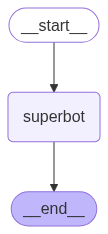

In [16]:
# compile the graph
graph_builder = graph.compile()

# view the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [17]:
graph_builder.invoke({"messages":"Who won the FIFA Club World Cup this year?"})

{'messages': [HumanMessage(content='Who won the FIFA Club World Cup this year?', additional_kwargs={}, response_metadata={}, id='7d1072cb-f12f-43cc-b710-f09200f817dd'),
  AIMessage(content="I'm sorry, but I don't have information on events or outcomes that occurred after October 2023. You might want to check the latest sports news or the official FIFA website for the most current information on the FIFA Club World Cup.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 17, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C0OJci0LWJC9oIzLvKkzjLBqIf3zV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b2fa7984-96f7-4e77-9c97-

In [18]:
graph_builder.invoke({"messages":"Microsoft AutoGen or Langgrapg, which is the best framework for Agentic AI ? "})

{'messages': [HumanMessage(content='Microsoft AutoGen or Langgrapg, which is the best framework for Agentic AI ? ', additional_kwargs={}, response_metadata={}, id='33c3672d-c123-445a-b96e-2ed935224fe0'),
  AIMessage(content='As of my last knowledge update in October 2023, both Microsoft AutoGen and Langchain (which I believe you meant by "Langgrapg") are frameworks that support the development of agent-based AI applications, but they serve slightly different purposes and have different strengths.\n\n### Microsoft AutoGen\n- **Purpose**: Designed primarily for automating tasks using AI and integrating with Microsoft\'s ecosystem. It leverages Azure services and integrates well with other Microsoft tools.\n- **Features**: Focused on multi-agent interaction, making it suitable for complex workflows that require collaboration between various AI agents.\n- **Use Cases**: Ideal for enterprise applications, automating business processes, or integrating with existing Microsoft software.\n\n###

### Streaming responses

In [20]:
for event in graph_builder.stream({"messages":"Hi, How are you?"}):
    print(event)

{'superbot': {'messages': AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-C0OT0K9xPblVs0ZJHe8H4XynhBO9m', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9451ddcc-5c6f-47f8-8a39-108f1b574b11-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}}


In [24]:
for event in graph_builder.stream({"messages":"Messi or Ronaldo who is the best?"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Messi or Ronaldo who is the best?', additional_kwargs={}, response_metadata={}, id='c32bf995-5ea7-4d7f-bda7-ce5f816f724b')]}
{'messages': [HumanMessage(content='Messi or Ronaldo who is the best?', additional_kwargs={}, response_metadata={}, id='c32bf995-5ea7-4d7f-bda7-ce5f816f724b'), AIMessage(content='The debate over who is the best between Lionel Messi and Cristiano Ronaldo is one of the most discussed topics in football (soccer) and often comes down to personal preference. Both players have had illustrious careers and have achieved incredible success, setting numerous records along the way.\n\n**Lionel Messi** is known for his dribbling ability, vision, and playmaking skills. His ability to score and assist, combined with his style of play, has earned him a reputation as one of the most naturally gifted players in history. He has spent the majority of his career at FC Barcelona before moving to Paris Saint-Germain and then Inter Miami. Messi has w